In [90]:
import os

print(os.getcwd())

os.chdir('C:/Users/stayde/Documents/Python Scripts/Python_7_Files')

C:\Users\stayde\Documents\Python Scripts\Python_7_Files


In [92]:
#We need to consider first sheet of the excel as dataframe and also we need to skip first 7 rows:

import pandas as pd

df = pd.read_excel("TREND01-5G-educ-fertility-bubbles.xls", sheet_name = 0, skiprows= 7)

type(df)

pandas.core.frame.DataFrame

In [76]:
print(df)

                              Country  Continent  female literacy fertility  \
0                                Chine       ASI             90.5     1.769   
1                                 Inde       ASI             50.8     2.682   
2                                  USA       NAM             99.0     2.077   
3                            Indonésie       ASI             88.8     2.132   
4                               Brésil       LAT             90.2     1.827   
5                             Pakistan       ASI             40.0     3.872   
6                           Bangladesh       ASI             49.8     2.288   
7                              Nigéria        AF             48.8     5.173   
8                 Fédération de Russie       EUR             99.4     1.393   
9                                Japan       ASI             99.0     1.262   
10                             Mexique       LAT             91.5     2.156   
11                         Philippines       ASI    

In [77]:
print(data.head())

print(100*'*')

print(data.tail())


    Country  Continent  female literacy  fertility    population
0      Chine       ASI             90.5      1.769  1.324655e+09
1       Inde       ASI             50.8      2.682  1.139965e+09
2        USA       NAM             99.0      2.077  3.040600e+08
3  Indonésie       ASI             88.8      2.132  2.273451e+08
4     Brésil       LAT             90.2      1.827  1.919715e+08
****************************************************************************************************
                 Country  Continent  female literacy  fertility  population
157               Vanuatu       OCE             79.5      3.883    233866.0
158                 Samoa       OCE             98.5      3.852    178869.0
159  Sao Tomé-et-Principe        AF             83.3      3.718    160174.0
160                 Aruba       LAT             98.0      1.732    105455.0
161                 Tonga       ASI             99.1      3.928    103566.0


In [78]:
# To pring column names:

df.columns

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')

In [79]:
#To print dimension of the dataframe:

df.shape

(162, 5)

In [93]:
#To print info of dataframe (Similar to str command in R):

df.info()

#As shown below, object represents categorical variable (stored as a string) and 'float64' represents numerical variable
#(If the numerical variable is not having any decimal number in it then it will be shown as 'int')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            162 non-null object
Continent          162 non-null object
female literacy    162 non-null float64
fertility          162 non-null object
population         121 non-null float64
dtypes: float64(2), object(3)
memory usage: 6.4+ KB


In [81]:
#To print summary statistics (Similar to summary command in R):

df.describe()


,female literacy,population
count,162.000000,1.200000e+02
mean,80.107407,7.340265e+07
std,23.052415,2.620983e+08
min,12.600000,1.035660e+05
25%,66.425000,7.555102e+06
50%,90.000000,1.606021e+07
75%,98.500000,4.311597e+07
max,100.000000,2.313866e+09


In [82]:
# Exploratory Data Analysis:

#Step 1 (Frequency Counts - Count the unique values in our data):
    #First select the column on which freq count needs to be performed:

df.Continent.value_counts(dropna = False)

#So number of each unique value in descending order is the output

AF     49
ASI    47
EUR    36
LAT    24
OCE     4
NAM     2
Name: Continent, dtype: int64

In [83]:
# Above code can also be written as:

df['Continent'].value_counts(dropna = False)

AF     49
ASI    47
EUR    36
LAT    24
OCE     4
NAM     2
Name: Continent, dtype: int64

In [59]:
df['Country '].value_counts(dropna = False).head()

Tchad                 1
Thaïlande             1
Hongrie               1
Ouzbékistan           1
Bosnie-Herzégovine    1
Name: Country , dtype: int64

In [60]:
df.fertility.value_counts(dropna = False).head()

missing    5
1.436      2
3.371      2
1.393      2
1.841      2
Name: fertility, dtype: int64

In [65]:
df.population.value_counts(dropna = False).head()

NaN             42
3.376680e+05     1
3.988298e+07     1
1.661115e+08     1
1.512123e+08     1
Name: population, dtype: int64

In [69]:
#Visual exploratory data analysis:

#Data visualization
#● Great way to spot outliers and obvious errors
#● More than just looking for pa!erns
#● Plan data cleaning steps

In [70]:
#Bar plots and histograms:

#● Bar plots for discrete data counts
#● Histograms for continuous data counts
#● Look at frequencies

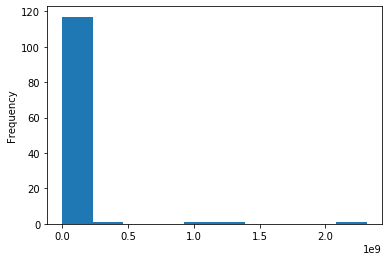

In [95]:
#Histogram:

df.population.plot('hist')



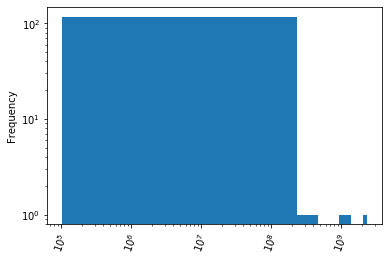

In [97]:
#Histogram with details:

df.population.plot(kind = 'hist', logx = True, logy = True, rot = 70)

In [86]:
# Identifying the error:

# Not all outliers are bad data points
# Some can be an error, but others are valid values

#Lets consider the populations beyond 1 biliion:

df[df.population > 1000000000]

#Population cannot be more than 2 billion. So Australia's data is wrong.
#India china even of they are outliers by calculation, we cannot remove them as they are actual true values


,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1.324655e+09
1,Inde,ASI,50.8,2.682,1.139965e+09
157,Australia,OCE,79.5,3.883,2.313866e+09


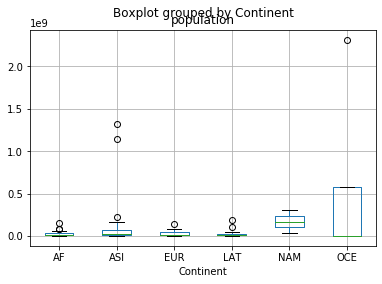

In [98]:
#Box Plot:

#● Visualize basic summary statistics
#● Outliers
#● Min/max
#● 25th, 50th, 75th percentiles

df.boxplot(column='population', by='Continent')


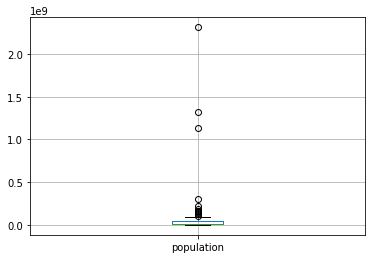

In [100]:
# For understanding of syntax:


df.boxplot('population')

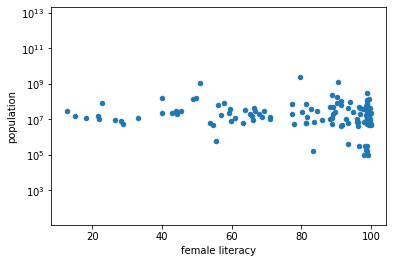

In [105]:
#Scatter plots
#● Relationship between 2 numeric variables
#● Flag potentially bad data
#● Errors not found by looking at 1 variable

df.plot(kind = 'scatter', x = 'female literacy', y = 'population', logy = True)

In [ ]:
# Tidy Data:

#● “Tidy Data” paper by Hadley Wickham, PhD
#● Formalize the way we describe the shape of data
#● Gives us a goal when forma!ing our data
#● “Standard way to organize data values within a dataset”


#Principles of tidy data:
#● Columns represent separate variables
#● Rows represent individual observations 

#(Unable to copy table here. So not mentioning code. Refer datacamp for more details on it. 7th course - 2nd set - video 1)

In [1]:
# Pivot Table:

# Pivot: un-melting data
#● Opposite of melting
#● In melting, we turned columns into rows
#● Pivoting: turn unique values into separate columns
#● Analysis friendly shape to reporting friendly shape
#● Violates tidy data principle: rows contain observations
#● Multiple variables stored in the same column


# Pivot table
# ● Has a parameter that specifies how to deal with duplicate values
# ● Example: Can aggregate the duplicate values by taking their average


#(Unable to copy table here. So not mentioning code. Refer datacamp for more details on it. 7th course - 2nd set - video 2)

In [ ]:
# Beyond melt and pivot:

# Melting and pivoting are basic tools
#● Another common problem:
#● Columns contain multiple bits of information


# Melting and parsing:

#● Nothing inherently wrong about original data shape
#● Not conducive for analysis


#(Unable to copy table here. So not mentioning code. Refer datacamp for more details on it. 7th course - 2nd set - video 3)

In [30]:
# Concatenating Data:

#Combining rows of the data:

# Pandas Concat:

# Create dataframes:

import pandas as pd

data_1 = {'name': ['saurabh', 'abhi', 'bunti', 'ashish'], 'age': [21,22,23,24], 'city': ['pune', 'mumbai', 'delhi', 'bangalore']}
df1 = pd.DataFrame(data_1)

data_2 = {'name': ['nitin', 'vivek', 'ankit', 'gaurav'], 'age': [25,26,27,28], 'city': ['ahm', 'chennai', 'kolkata', 'ytl'] }
df2 = pd.DataFrame(data_2)

#Now lets concatenate these dataframes (Make sure to pass the dataframes into list):

concatenated_df = pd.concat([df1, df2])

print(concatenated_df)

      name  age       city
0  saurabh   21       pune
1     abhi   22     mumbai
2    bunti   23      delhi
3   ashish   24  bangalore
0    nitin   25        ahm
1    vivek   26    chennai
2    ankit   27    kolkata
3   gaurav   28        ytl


In [32]:
# In the above output, we can see that, indexes are getting repeated. We can go with following appraoch in such case:

concatenated_df_2 = pd.concat([df1, df2], ignore_index = True)

print(concatenated_df_2)

#So as we can see indexing of each dataframe is ignored and new indexes have been formed 

      name  age       city
0  saurabh   21       pune
1     abhi   22     mumbai
2    bunti   23      delhi
3   ashish   24  bangalore
4    nitin   25        ahm
5    vivek   26    chennai
6    ankit   27    kolkata
7   gaurav   28        ytl


In [34]:
#Instead of creating separate df1 and df2, we can also write following command:

concatenated_df_3 = pd.concat([pd.DataFrame(data_1), pd.DataFrame(data_2)], ignore_index = True)

print(concatenated_df_3)

      name  age       city
0  saurabh   21       pune
1     abhi   22     mumbai
2    bunti   23      delhi
3   ashish   24  bangalore
4    nitin   25        ahm
5    vivek   26    chennai
6    ankit   27    kolkata
7   gaurav   28        ytl


In [29]:
#If we want, while creating dataframe, we can set these indexes as follows:

data_33 = {'name': ['saurabh', 'abhi', 'bunti', 'ashish'], 'age': [21,22,23,24], 'city': ['pune', 'mumbai', 'delhi', 'bangalore']}

df33 = pd.DataFrame(data_33, index = [1,2,3,4])

print(df33)

print(40*'*')

# or we can also write:

df44 = pd.DataFrame(data_33, index = ['first', 'second', 'third', 'fourth'])

print(df44)


      name  age       city
1  saurabh   21       pune
2     abhi   22     mumbai
3    bunti   23      delhi
4   ashish   24  bangalore
****************************************
           name  age       city
first   saurabh   21       pune
second     abhi   22     mumbai
third     bunti   23      delhi
fourth   ashish   24  bangalore


In [44]:
# Combining columns of the data:

data1 = {'name': ['saurabh', 'rohit', 'gauri', 'sarang'], 'age': [21,22,23,24]}

data2 = {'city': ['mumbai', 'pune', 'bangalore', 'delhi'], 'hobby': ['sing', 'dance', 'paint', 'gym']}

df_1 = pd.DataFrame(data1)
df_2 = pd.DataFrame(data2)

# Suppose we want to combine these two datasets columnwise:

df_columnwise = pd.concat([df_1, df_2], axis = 1)

print(df_columnwise)

      name  age       city  hobby
0  saurabh   21     mumbai   sing
1    rohit   22       pune  dance
2    gauri   23  bangalore  paint
3   sarang   24      delhi    gym


In [50]:
# Concatenating many files:

#In order to concatenate DataFrames:
#● They must be in a list
#● Can individually load if there are a few datasets
#● But what if there are thousands?
#   Solution: glob function to find files based on a pattern

#Globbing:
#● Pattern matching for file names
#● Wildcards: * ?
#● Any csv file: *.csv
#● Any single character: file_?.csv
#● Returns a list of file names
#● Can use this list to load into separate DataFrames

#The plan:
#● Load files from globbing into pandas
#● Add the DataFrames into a list
#● Concatenate multiple datasets at once

import glob

csv_files = glob.glob('*.csv')

print(csv_files)

list_data = []

for filename in csv_files:
    data = pd.read_csv(filename)
    list_data.append(data)
    
pd.concat(list_data, axis = 1)


['binary.csv', 'BRICS_Data.csv', 'winequality-white.csv']


,admit,gre,gpa,rank,Unnamed: 0,country,capital,area,population,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,0.0,380.0,3.61,3.0,BR,Brazil,Brasilia,8.516,200.40,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,1.0,660.0,3.67,3.0,RU,Russia,Moscow,17.100,143.50,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,1.0,800.0,4.00,1.0,IN,India,New Delhi,3.286,1252.00,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,1.0,640.0,3.19,4.0,CH,China,Beijing,9.597,1357.00,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,0.0,520.0,2.93,4.0,SA,South Africa,Pretoria,1.221,52.98,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
5,1.0,760.0,3.00,2.0,NaN,NaN,NaN,NaN,NaN,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
6,1.0,560.0,2.98,1.0,NaN,NaN,NaN,NaN,NaN,6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;...
7,0.0,400.0,3.08,2.0,NaN,NaN,NaN,NaN,NaN,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
8,1.0,540.0,3.39,3.0,NaN,NaN,NaN,NaN,NaN,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
9,0.0,700.0,3.92,2.0,NaN,NaN,NaN,NaN,NaN,8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.4...


In [57]:
#Merge:

#In above commands, we have dealt with combining the dataframes.
#Now lets check merging of the dataframes:

#Similar to joining tables in SQL
#● Combine disparate datasets based on common columns

#Different types of merges
#● One-to-one
#● Many-to-one
#● Many-to-many

#● All use the same function
#● Only difference is the DataFrames you are merging

#Consider following example of one to one merge:

data10 = {'state': ['California', 'Texas', 'Florida', 'New York'], 'population_2016': [100,200,300,400]}

data20 = {'name': ['California', 'Florida', 'New York', 'Texas'], 'ANSI': ['CA', 'FL', 'NY', 'TX']}

state_populations = pd.DataFrame(data10)

state_codes = pd.DataFrame(data20)

print(state_populations)

print(40*'*')

print(state_codes)

        state  population_2016
0  California              100
1       Texas              200
2     Florida              300
3    New York              400
****************************************
         name ANSI
0  California   CA
1     Florida   FL
2    New York   NY
3       Texas   TX


In [60]:
#Suppose we want to merge above two dataframes:

pd.merge(left = state_populations, right = state_codes, on = None, left_on = 'state', right_on = 'name')

#Here as we dont have any common column thats why we have written 'on = None'.

#Consider following example of same column name merge:


,state,population_2016,name,ANSI
0,California,100,California,CA
1,Texas,200,Texas,TX
2,Florida,300,Florida,FL
3,New York,400,New York,NY


In [62]:
data10 = {'state': ['California', 'Texas', 'Florida', 'New York'], 'population_2016': [100,200,300,400]}

data20 = {'state': ['California', 'Florida', 'New York', 'Texas'], 'ANSI': ['CA', 'FL', 'NY', 'TX']}

state_populations = pd.DataFrame(data10)

state_codes = pd.DataFrame(data20)

print(state_populations)

print(40*'*')

print(state_codes)


        state  population_2016
0  California              100
1       Texas              200
2     Florida              300
3    New York              400
****************************************
        state ANSI
0  California   CA
1     Florida   FL
2    New York   NY
3       Texas   TX


In [63]:
pd.merge(left = state_populations, right = state_codes, on = 'state')

,state,population_2016,ANSI
0,California,100,CA
1,Texas,200,TX
2,Florida,300,FL
3,New York,400,NY


In [54]:
# Cleaning Data For Analysis:

#Data Type:

import pandas as pd

data = {'name': ['Daniel', 'John', 'Jane'], 'sex': ['M','M','F'], 'treatment_a': ['-', 12, 14], 'treatment_b': [42,31,27]}

df = pd.DataFrame(data)

df

,name,sex,treatment_a,treatment_b
0,Daniel,M,-,42
1,John,M,12,31
2,Jane,F,14,27


In [55]:
#To print Data Types of the dataframe:

print(df.dtypes)

name           object
sex            object
treatment_a    object
treatment_b     int64
dtype: object


In [53]:
#There may be times we want to convert from one type to another
# ● Numeric columns can be strings, or vice versa

# Converting data types:

#Suppose we want to convert object data type into string for treatment:

df['treatment_b'] = df['treatment_b'].astype(str)

#Lets change data type of sex to category as its only 2 levels:

df['sex'] = df['sex'].astype('category')

print(df.dtypes)

#so as shown in output data type has been changed for the two variables

name             object
sex            category
treatment_a      object
treatment_b      object
dtype: object


In [57]:
#Above syntax can also be written as:

#Suppose we want to convert object data type into string for treatment:

df.treatment_b = df.treatment_b.astype(str)

#Lets change data type of sex to category as its only 2 levels:

df.sex = df.sex.astype('category')

df

print(df.dtypes)

name             object
sex            category
treatment_a      object
treatment_b      object
dtype: object


In [41]:
#Categorical data
#● Converting categorical data to ‘category’ dtype:
#● Can make the DataFrame smaller in memory
#● Can make them be utilized by other Python libraries for analysis


In [42]:
print(df.dtypes)

# Now as shown in output, data type of treatment_a is 'object'
# This is because of the '-' that is present in the column 'treatment_a'
# Lets convert treatment_a into integer data type:

name             object
sex            category
treatment_a      object
treatment_b      object
dtype: object


In [46]:
df['treatment_a'] = pd.to_numeric(df['treatment_a'], errors = 'coerce') 

print(df.dtypes)

print(50*'*')

print(df)

#So in output we can see '-' has been replaced by NaN, thats how we change data type of 'treatment_a'

name             object
sex            category
treatment_a     float64
treatment_b      object
dtype: object
**************************************************
     name sex  treatment_a treatment_b
0  Daniel   M          NaN          42
1    John   M         12.0          31
2    Jane   F         14.0          27


In [59]:
# Using regular expressions to clean strings:

#String manipulation
#● Much of data cleaning involves string manipulation
#● Most of the world’s data is unstructured text
#● Also have to do string manipulation to make datasets consistent with one another


import re    #'re' indicates regular expression

pattern = re.compile('\$\d*\.\d{2}')
result = pattern.match('$17.89')
bool(result)


True

In [58]:
# Compile a pattern that matches a phone number of the format xxx-xxx-xxxx:

#Use \d{x} to match x digits. Here you'll need to use it three times: twice to match 3 digits, and once to match 4 digits.
#Place the regular expression inside re.compile()

import re
prog = re.compile('\d{3}-\d{3}-\d{4}')

#Using the .match() method on prog, check whether the pattern matches the string '123-456-7890' (It should give true result) 
#Using the same approach, now check whether the pattern matches the string '1123-456-7890' (It should give false result)

# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))

True
False


In [65]:
# Using functions to clean data:

#Complex cleaning
#● Cleaning step requires multiple steps
#● Extract number from string
#● Perform transformation on extracted number 

#Python function Apply:

import pandas as pd

data = {'treatment_a': [18, 12, 14], 'treatment_b': [42,31,27]}

df = pd.DataFrame(data, index = ['Daniel', 'John', 'Jane'])

df


,treatment_a,treatment_b
Daniel,18,42
John,12,31
Jane,14,27


In [67]:
#Suppose in above case if we want to find mean across the columns:

import numpy as np

df.apply(np.mean, axis = 0)

treatment_a    14.666667
treatment_b    33.333333
dtype: float64

In [68]:
# Also if we want to find mean across the rows:

df.apply(np.mean, axis = 1)

Daniel    30.0
John      21.5
Jane      20.5
dtype: float64

In [82]:
# Consider following example:

# Combining columns of the data:

data1 = {'name': ['saurabh', 'rohit', 'gauri', 'sarang'], 'age': [21,22,23,24]}

data2 = {'city': ['mumbai', 'pune', 'bangalore', 'delhi'], 'hobby': ['sing', 'dance', 'paint', 'gym']}

df_1 = pd.DataFrame(data1)
df_2 = pd.DataFrame(data2)

# Suppose we want to combine these two datasets columnwise:

df_columnwise = pd.concat([df_1, df_2], axis = 1)

df_columnwise['Initial Cost'] = ['$1000.00', '$0.00', '$3000.00', '$4000.00']
df_columnwise['Total Est. Fee'] = ['$100.00', '$200.00', '$300.00', '$400.00']

print(df_columnwise)

      name  age       city  hobby Initial Cost Total Est. Fee
0  saurabh   21     mumbai   sing     $1000.00        $100.00
1    rohit   22       pune  dance        $0.00        $200.00
2    gauri   23  bangalore  paint     $3000.00        $300.00
3   sarang   24      delhi    gym     $4000.00        $400.00


In [ ]:
#In above dataframe, pur aim is to find difference between 'Initial Cost' and 'Total Est. Fee'

In [81]:
# To deal with $ sign and all:

import re
from numpy import NaN
pattern = re.compile('^\$\d*\.\d{2}$')


In [89]:
#Write the function to find the difference between last two columns:

def diff_money(row, pattern):
 icost = row['Initial Cost']
 tef = row['Total Est. Fee']

 if bool(pattern.match(icost)) and bool(pattern.match(tef)):
     icost = icost.replace("$","")
     tef = tef.replace("$","")

     icost = float(icost)
     tef = float(tef)
    
     return icost - tef
 else:
     return(NaN)
    
#Now in above function even if we require only 2 elements in each row still we are passing entire row



NameError: name 'df_subset' is not defined

In [92]:
df_columnwise['diff'] = df_columnwise.apply(diff_money, axis=1, pattern=pattern)

In [93]:
print(df_columnwise.head()) 

      name  age       city  hobby Initial Cost Total Est. Fee    diff
0  saurabh   21     mumbai   sing     $1000.00        $100.00   900.0
1    rohit   22       pune  dance        $0.00        $200.00  -200.0
2    gauri   23  bangalore  paint     $3000.00        $300.00  2700.0
3   sarang   24      delhi    gym     $4000.00        $400.00  3600.0


In [3]:
# Duplicate and missing data:

#Consider following example:

import pandas as pd

data = {'name': ['Daniel', 'John', 'Jane', 'Daniel'], 'treatment_a': [18, 12, 14, 18], 'treatment_b': [42,31,27, 42]}

df = pd.DataFrame(data, index = ['Daniel', 'John', 'Jane', 'Daniel'])

print(df)

          name  treatment_a  treatment_b
Daniel  Daniel           18           42
John      John           12           31
Jane      Jane           14           27
Daniel  Daniel           18           42


In [4]:
#Now suppose we want to drop duplicate values of the above table:

df = df.drop_duplicates()

In [6]:
print(df)

          name  treatment_a  treatment_b
Daniel  Daniel           18           42
John      John           12           31
Jane      Jane           14           27


In [4]:
#Missing Data:

import os

os.getcwd()

os.chdir('C:/Users/stayde/Documents/Python Scripts/Python_7_Files')

import pandas as pd

tips = pd.read_excel('TREND01-5G-educ-fertility-bubbles_Part2(For missing value fill).xls', sheetname = 0, skiprows = 7)

In [5]:
tips.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1.324655e+09
1,Inde,ASI,50.8,2.682,1.139965e+09
2,USA,NAM,99.0,2.077,3.040600e+08
3,Indonésie,NaN,88.8,2.132,2.273451e+08
4,Brésil,NaN,90.2,1.827,1.919715e+08


In [33]:
#Missing data can be dealt as:

#● Leave as-is
#● Drop them
#● Fill missing value


#To count missing values in the dataset we can use function info():

print(tips.shape)

print(20*'*')

tips.info()


(162, 5)
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            154 non-null object
Continent          153 non-null object
female literacy    149 non-null float64
fertility          153 non-null float64
population         121 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


In [ ]:
#So from the result above we can see that:

#The total number of rows in the data is 162. But none of the columns have 162 non null values
#So we have missing data in all the columns


In [16]:
#Lets drop the missing values (Use drop function):
tips_dropped = tips.dropna()

print(tips_dropped.head())

#Lets check shape now:

print(80*'*')
print(tips_dropped.shape)

tips.info()

    Country  Continent  female literacy  fertility    population
0      Chine       ASI             90.5      1.769  1.324655e+09
1       Inde       ASI             50.8      2.682  1.139965e+09
2        USA       NAM             99.0      2.077  3.040600e+08
3  Indonésie   missing             88.8      2.132  2.273451e+08
4     Brésil   missing             90.2      1.827  1.919715e+08
********************************************************************************
(91, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            154 non-null object
Continent          162 non-null object
female literacy    149 non-null float64
fertility          153 non-null float64
population         121 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


In [17]:
#Fill missing values with .fillna():

#● Fill with provided value  
#● Use a summary statistic (mean/median etc)

tips.info()

#● Fill with provided value (fill blank value with 'missing' word):

tips['Continent'] = tips['Continent'].fillna('missing')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            154 non-null object
Continent          162 non-null object
female literacy    149 non-null float64
fertility          153 non-null float64
population         121 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


In [28]:

#As shown above, we filled missing values of only one variable.
#We can do the same for many variables by passing the list of variables:

tips[['Country ', 'fertility', 'population']] = tips[['Country ', 'fertility', 'population']].fillna('missing')
tips.info()

tips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            162 non-null object
Continent          153 non-null object
female literacy    149 non-null float64
fertility          162 non-null object
population         162 non-null object
dtypes: float64(1), object(4)
memory usage: 6.4+ KB


,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1.32466e+09
1,Inde,ASI,50.8,2.682,1.13996e+09
2,USA,NAM,99.0,2.077,3.0406e+08
3,Indonésie,NaN,88.8,2.132,2.27345e+08
4,Brésil,NaN,90.2,1.827,1.91972e+08
5,Pakistan,NaN,40.0,3.872,1.66111e+08
6,Bangladesh,NaN,49.8,2.288,1.6e+08
7,Nigéria,NaN,48.8,5.173,1.51212e+08
8,Fédération de Russie,NaN,99.4,1.393,1.4195e+08
9,Japan,NaN,99.0,1.262,1.27704e+08


In [29]:
#So we have filled avlues for total 4 colums:

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            162 non-null object
Continent          153 non-null object
female literacy    149 non-null float64
fertility          162 non-null object
population         162 non-null object
dtypes: float64(1), object(4)
memory usage: 6.4+ KB


In [30]:
# Lets reset our dataset:

#Missing Data:

import os

os.getcwd()

os.chdir('C:/Users/stayde/Documents/Python Scripts/Python_7_Files')

import pandas as pd

tips = pd.read_excel('TREND01-5G-educ-fertility-bubbles_Part2(For missing value fill).xls', sheetname = 0, skiprows = 7)


In [32]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            154 non-null object
Continent          153 non-null object
female literacy    149 non-null float64
fertility          153 non-null float64
population         121 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


In [36]:
# Similar to above we can also fill the missing values with a number:

tips[['female literacy', 'fertility', 'population']] = tips[['female literacy', 'fertility', 'population']].fillna(10000)

tips

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,9.050000e+01,1.769,1.324655e+09
1,Inde,ASI,5.080000e+01,2.682,1.139965e+09
2,USA,NAM,9.900000e+01,2.077,3.040600e+08
3,Indonésie,NaN,8.880000e+01,2.132,2.273451e+08
4,Brésil,NaN,9.020000e+01,1.827,1.919715e+08
5,Pakistan,NaN,4.000000e+01,3.872,1.661115e+08
6,Bangladesh,NaN,4.980000e+01,2.288,1.600001e+08
7,Nigéria,NaN,4.880000e+01,5.173,1.512123e+08
8,Fédération de Russie,NaN,9.940000e+01,1.393,1.419500e+08
9,Japan,NaN,9.900000e+01,1.262,1.277040e+08


In [51]:
#Fill missing values with a test statistic
#● Careful when using test statistics to fill
#● Have to make sure the value you are filling in makes sense
#● Median is a be!er statistic in the presence of outliers

# Lets reset our dataset:

#Missing Data:

import os

os.getcwd()

os.chdir('C:/Users/stayde/Documents/Python Scripts/Python_7_Files')

import pandas as pd

tips = pd.read_excel('TREND01-5G-educ-fertility-bubbles_Part2(For missing value fill).xls', sheetname = 0, skiprows = 7)

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            154 non-null object
Continent          153 non-null object
female literacy    149 non-null float64
fertility          153 non-null float64
population         121 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


In [60]:
# Fill missing values with a test statistic:

population_Mean = tips['population'].mean()

tips['population'] = tips['population'].fillna(population_Mean)


In [53]:
tips

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1.324655e+09
1,Inde,ASI,50.8,2.682,1.139965e+09
2,USA,NAM,99.0,2.077,3.040600e+08
3,Indonésie,NaN,88.8,2.132,2.273451e+08
4,Brésil,NaN,90.2,1.827,1.919715e+08
5,Pakistan,NaN,40.0,3.872,1.661115e+08
6,Bangladesh,NaN,49.8,2.288,1.600001e+08
7,Nigéria,NaN,48.8,5.173,1.512123e+08
8,Fédération de Russie,NaN,99.4,1.393,1.419500e+08
9,Japan,NaN,99.0,1.262,1.277040e+08


In [55]:
#Testing with asserts:

#Assert statements
#● Programmatically vs visually checking
#● If we drop or fill NaNs, we expect 0 missing values
#● We can write an assert statement to verify this
#● We can detect early warnings and errors
#● This gives us confidence that our code is running correctly

assert 1==1

#No result of above command as there's no output of it

In [59]:
assert 1 == 0    #this command is giving error as statement is wrong

AssertionError: 

In [65]:
#So lets check assert statement on column population:

# Lets reset our dataset:

#Missing Data:

import os

os.getcwd()

os.chdir('C:/Users/stayde/Documents/Python Scripts/Python_7_Files')

import pandas as pd

tips = pd.read_excel('TREND01-5G-educ-fertility-bubbles_Part2(For missing value fill).xls', sheetname = 0, skiprows = 7)

tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
Country            154 non-null object
Continent          153 non-null object
female literacy    149 non-null float64
fertility          153 non-null float64
population         121 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.4+ KB


In [67]:
#Lets test assert now on population column:

assert tips.population.notnull().all()


AssertionError: 

In [69]:
#So we are getting assertion error here, now lets check assertion after filling all the missing values:

tips_filled = tips.fillna(0)

In [72]:
assert tips_filled.population.notnull().all()

#This not generating any error. So we can confirm all the values are filled.